In [2]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

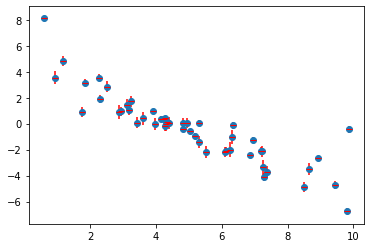

In [7]:
(x,y,error) = np.load('fit_exercise.npy') 
sigma= y.var() 

plt.plot(x,y,'o')
plt.errorbar(x,y,error,color='red', fmt='_')
plt.show()

1.-LINEAR LEAST SQUARE METHOD:

a = 4.577859303753354
b = -0.9821623517930412


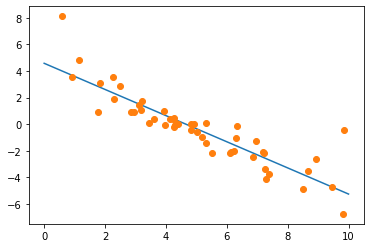

In [9]:
#Hacemos el cálculo de los parámetros de la recta con la forma bx+a:
a=(y.mean()*sum(x**2)-x.mean()*sum(x*y))/(sum(x**2)-len(x)*(x.mean()**2))
print("a =",a)

b=(sum(x*y)-len(x)*x.mean()*y.mean())/(sum(x**2)-len(x)*(x.mean()**2))
print("b =", b)

z = np.linspace(0, 10, 10)
plt.plot(z, b*z+a)
plt.plot(x,y,'o')
plt.show()

2.- Minimum Chisq.

a =  4.577858455234005
b =  -0.9821622076196773


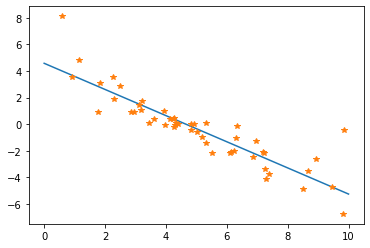

In [21]:
def linea(x,theta):
    a=theta[0]
    b=theta[1]
    return a+b*x

def chi2(theta):
    return np.sum(((y-linea(x,theta))**2)/sigma**2)

inicio=(0,0)
theta=opt.minimize(chi2,inicio)

print('a = ',theta.x[0])
print('b = ',theta.x[1])

z = np.linspace(0, 10, 10)
plt.plot(z, theta.x[1]*z+theta.x[0])
plt.plot(x,y,'*')
plt.show()

3.- Sampling from the maximum likelihood.

b = -1.003
a = 4.528


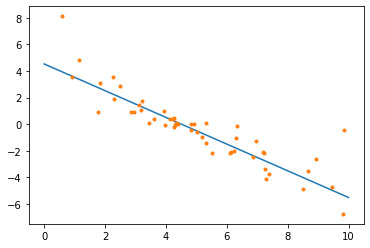

In [26]:
#Para este ajuste modifiqué la parte correspondiente del turorial donde utilizamos Emcee


def likelihood(theta, x, y, error):
    b, a, log_f = theta
    modelo = b * x + a
    sigma2 = error ** 2 + modelo ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - modelo) ** 2 / sigma2 + np.log(sigma2))

m_real = 30.0
b_real = 200.0
f_real = 0.01

np.random.seed(42)
nll = lambda *args: -likelihood(*args)
initial = np.array([m_real, b_real, np.log(f_real)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, error))
b_res, a_res, log_f_ml = soln.x

print("b = {0:.3f}".format(m_ml))
print("a = {0:.3f}".format(b_ml))

z = np.linspace(0, 10, 10)
plt.plot(z, b_res*z+a_res)
plt.plot(x,y,'.')
plt.show()